In [133]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Reshape

In [135]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [137]:
df.shape

(7748, 10)

In [179]:
stations_name = list(df.columns)
stations_name.remove("dt")

index_name = {}
for i, name in enumerate(stations_name):
    index_name[i] = name
index_name

{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [139]:
df = df.interpolate(method="linear")

In [141]:
df.isna().sum()

dt           0
FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [143]:
df = df[8:]
df.shape

(7740, 10)

In [145]:
def create_3d_array(array, window_size, overlap):
    step = window_size - overlap
    num_rows, num_columns = array.shape
    num_windows = (num_rows - window_size) // step + 1

    array_3d = np.zeros((num_windows, window_size, num_columns))

    count = 0
    for i in range(0, num_windows, step):
        array_3d[count] = array[i:i+window_size]
        count += 1

    return array_3d

In [147]:
datetime = df["dt"]

data = df.drop(columns = ['dt'])
data.shape

(7740, 9)

In [149]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [151]:
X_train = create_3d_array(scaled_data, 10, 6)
X_train.shape

(1933, 10, 9)

In [153]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 9)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Flatten(),    
    Dense(64, activation='relu'),
    Dense(10 * 9, activation='linear'),
    Reshape((10, 9))
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
model.fit(X_train, X_train, epochs = 100, batch_size = 64)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.3275 
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0576
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.0235
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0153
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.0074
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0033
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.0029  
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.0029
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0025
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0024
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0024
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0021
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0022
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0020
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 

In [157]:
X_test = create_3d_array(scaled_data, 10, 0)

In [159]:
model.evaluate(X_test, X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 5.8875e-04


0.00020726256479974836

In [161]:
y_pred = model.predict(X_test[0].reshape(1,10,9))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [163]:
y_act = X_test[0]
y_pred = y_pred[0]

y_act.shape, y_pred.shape

((10, 9), (10, 9))

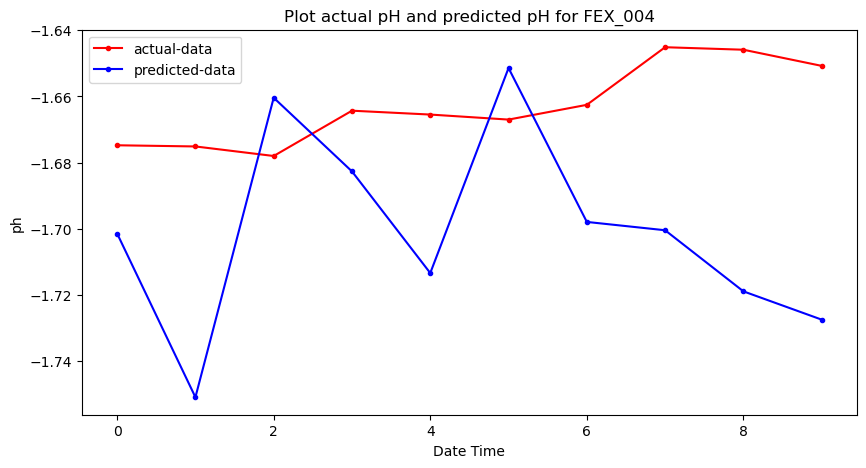

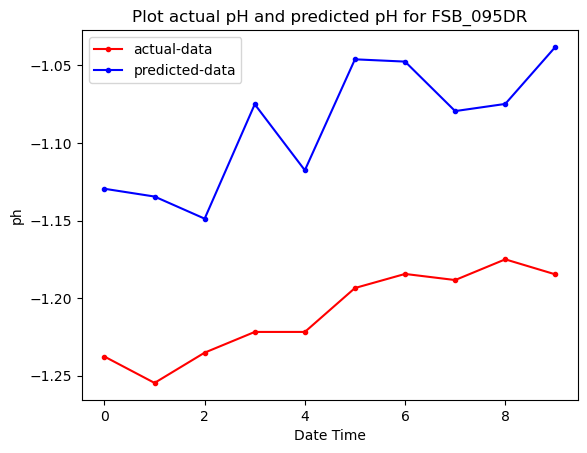

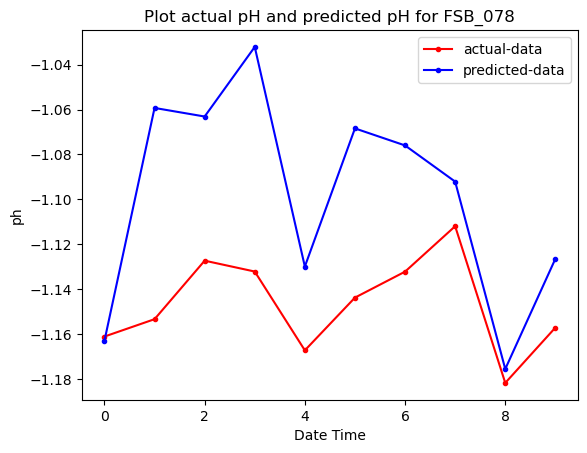

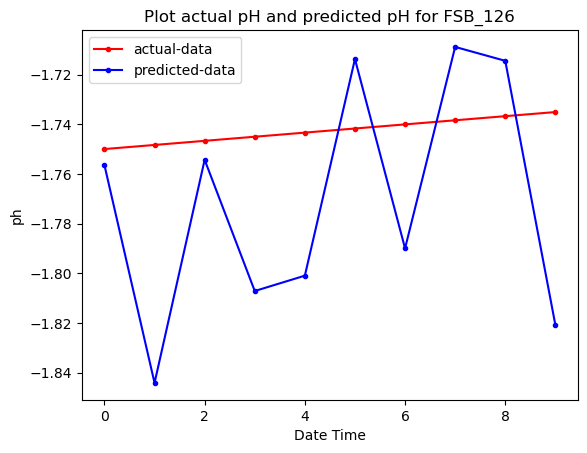

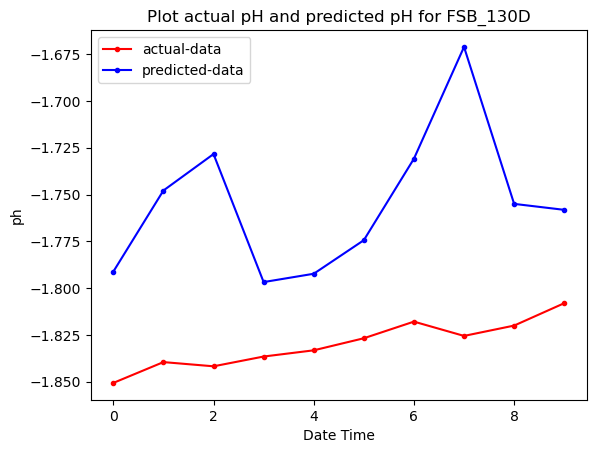

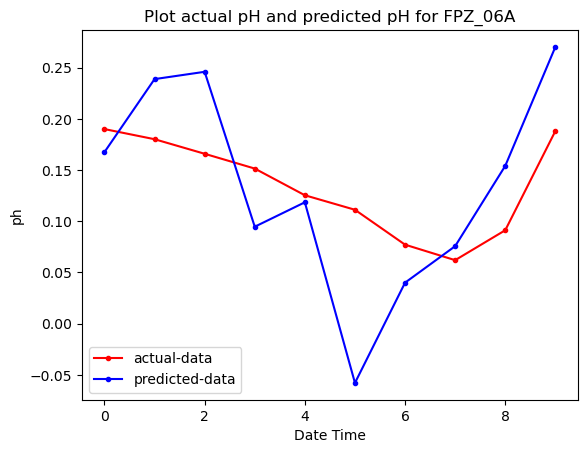

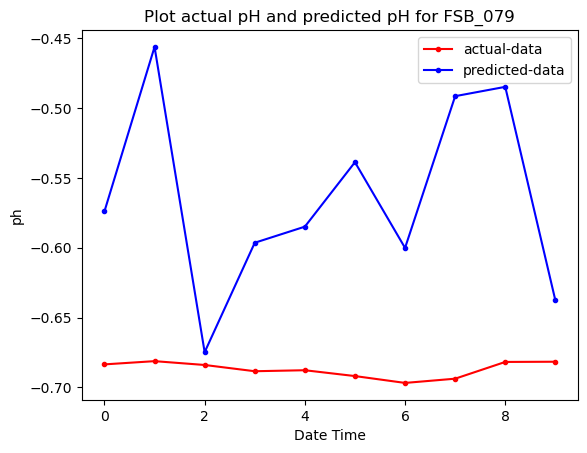

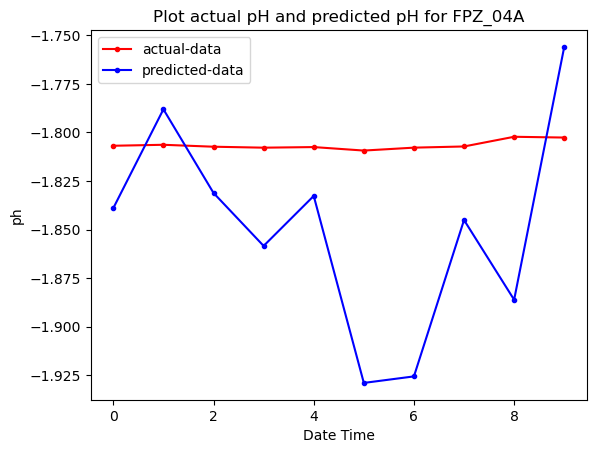

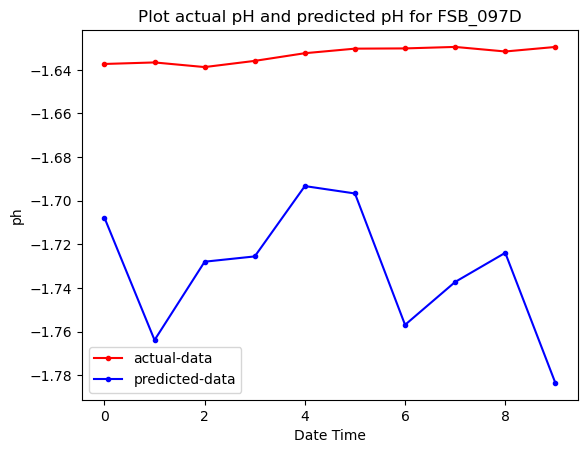

In [181]:
plt.figure(figsize=(10, 5))
for index in range(9):
    plt.plot(y_act[:, index], marker='.', color="red", label="actual-data")
    plt.plot(y_pred[:, index], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot actual pH and predicted pH for {index_name[index]}')
    plt.legend()
    plt.show()